In [295]:
import pandas as pd
# sys.path.insert(0, 'D:\GitHub Repos\MLib in Python\MLib-in-python')
# import MLib
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [296]:
DFOriginal = pd.read_csv('csv-wsn-ids-ds.csv')
OutPutLabel : str = 'Attack type'
InputLabels : list = DFOriginal.columns.tolist()
InputLabels.remove(OutPutLabel)
print('Input Labels Count: ', len(InputLabels))
InputLabels

Input Labels Count:  18


[' id',
 ' Time',
 ' Is_CH',
 ' who CH',
 ' Dist_To_CH',
 ' ADV_S',
 ' ADV_R',
 ' JOIN_S',
 ' JOIN_R',
 ' SCH_S',
 ' SCH_R',
 'Rank',
 ' DATA_S',
 ' DATA_R',
 ' Data_Sent_To_BS',
 ' dist_CH_To_BS',
 ' send_code ',
 'Expaned Energy']

In [297]:
DFOriginal[OutPutLabel].value_counts().index.tolist()

['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

In [298]:
DFOriginal.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [299]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [300]:
# Display the number of missing values in each column
DFOriginal.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [301]:
DFOriginal.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [302]:
# Display the number of unique values in each column
DFOriginal.nunique()

 id                 11120
 Time                 196
 Is_CH                  2
 who CH              7088
 Dist_To_CH         13956
 ADV_S                 85
 ADV_R                 31
 JOIN_S                 2
 JOIN_R               101
 SCH_S                 95
 SCH_R                  2
Rank                  100
 DATA_S               192
 DATA_R              1345
 Data_Sent_To_BS      237
 dist_CH_To_BS        305
 send_code             16
Expaned Energy      69352
Attack type             5
dtype: int64

In [303]:
DFOriginal.drop_duplicates(inplace=True)

In [304]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365788 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               365788 non-null  int64  
 1    Time             365788 non-null  int64  
 2    Is_CH            365788 non-null  int64  
 3    who CH           365788 non-null  int64  
 4    Dist_To_CH       365788 non-null  float64
 5    ADV_S            365788 non-null  int64  
 6    ADV_R            365788 non-null  int64  
 7    JOIN_S           365788 non-null  int64  
 8    JOIN_R           365788 non-null  int64  
 9    SCH_S            365788 non-null  int64  
 10   SCH_R            365788 non-null  int64  
 11  Rank              365788 non-null  int64  
 12   DATA_S           365788 non-null  int64  
 13   DATA_R           365788 non-null  int64  
 14   Data_Sent_To_BS  365788 non-null  int64  
 15   dist_CH_To_BS    365788 non-null  float64
 16   send_code        365788 

array([[<Axes: title={'center': ' id'}>,
        <Axes: title={'center': ' Time'}>,
        <Axes: title={'center': ' Is_CH'}>,
        <Axes: title={'center': ' who CH'}>],
       [<Axes: title={'center': ' Dist_To_CH'}>,
        <Axes: title={'center': ' ADV_S'}>,
        <Axes: title={'center': ' ADV_R'}>,
        <Axes: title={'center': ' JOIN_S'}>],
       [<Axes: title={'center': ' JOIN_R'}>,
        <Axes: title={'center': ' SCH_S'}>,
        <Axes: title={'center': ' SCH_R'}>,
        <Axes: title={'center': 'Rank'}>],
       [<Axes: title={'center': ' DATA_S'}>,
        <Axes: title={'center': ' DATA_R'}>,
        <Axes: title={'center': ' Data_Sent_To_BS'}>,
        <Axes: title={'center': ' dist_CH_To_BS'}>],
       [<Axes: title={'center': ' send_code '}>,
        <Axes: title={'center': 'Expaned Energy'}>, <Axes: >, <Axes: >]],
      dtype=object)

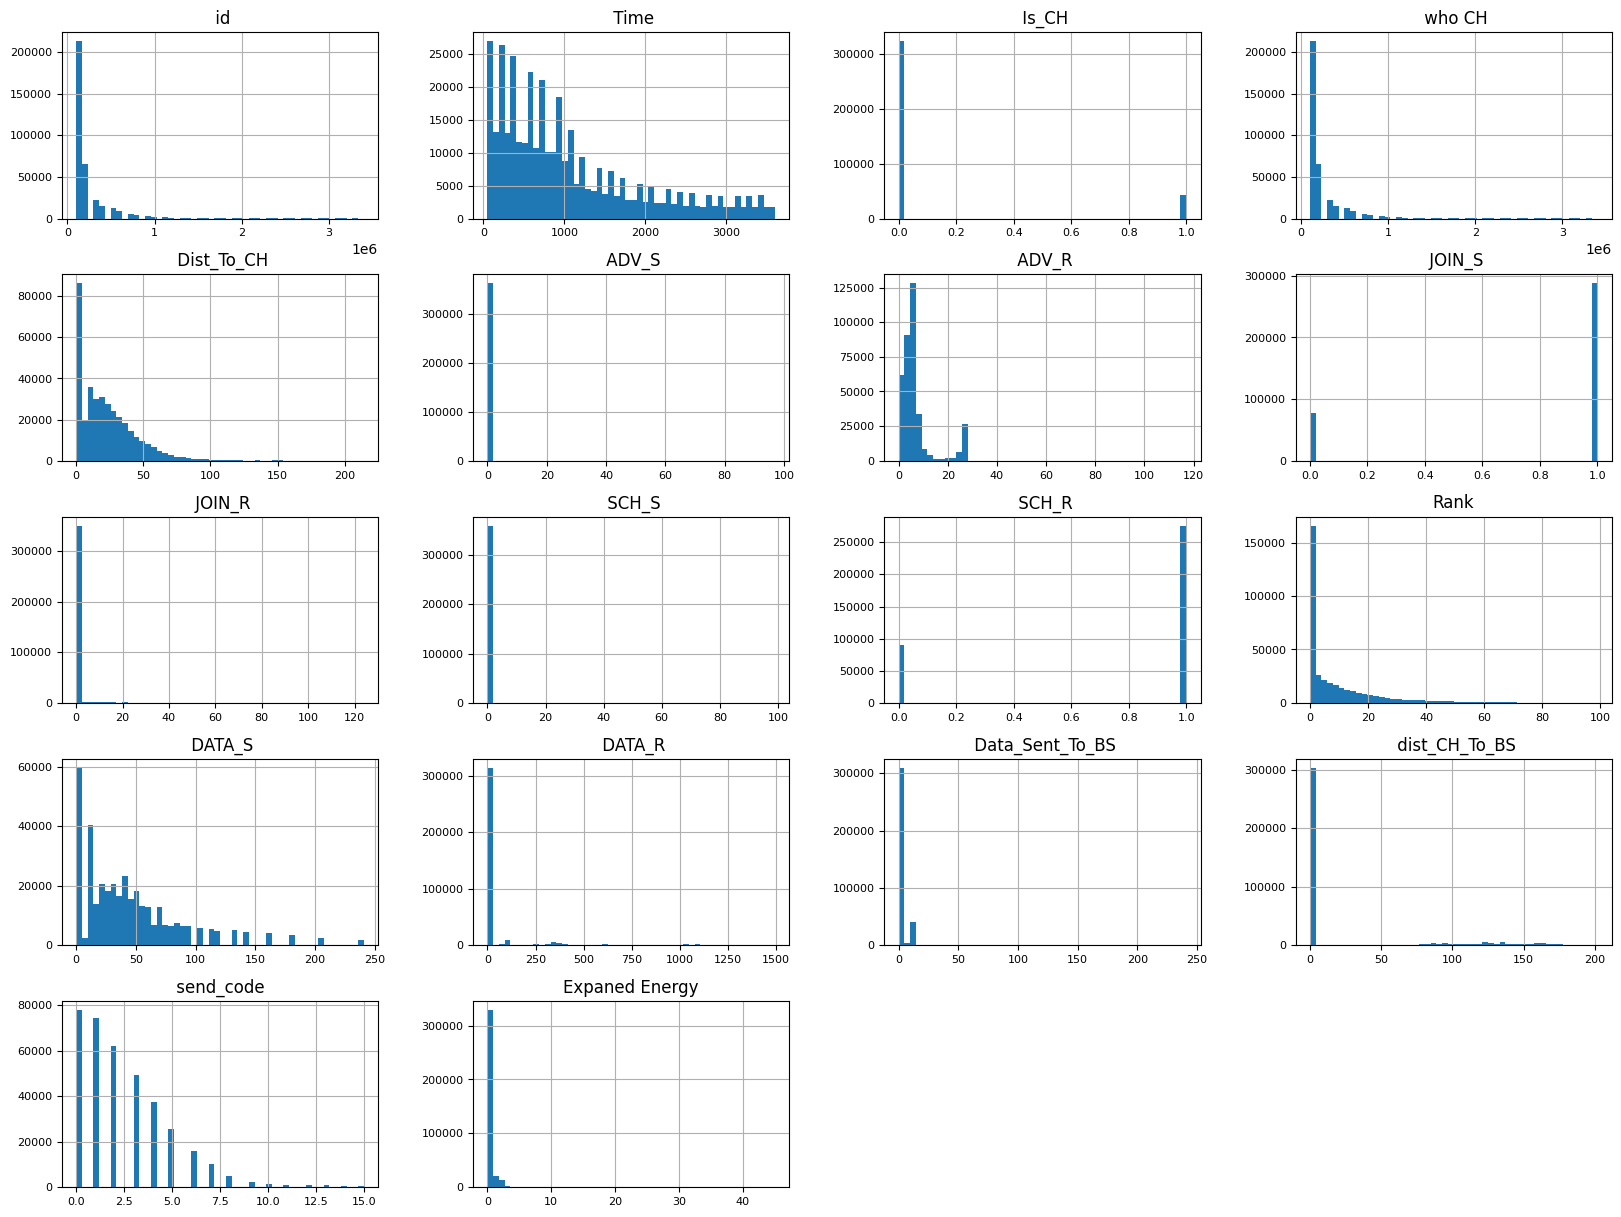

In [305]:
DFOriginal.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [306]:
DFOriginal[OutPutLabel].value_counts()

Attack type
Normal       332040
Grayhole      13909
Blackhole     10049
TDMA           6633
Flooding       3157
Name: count, dtype: int64

In [307]:
# Display the first few rows of the dataset
DFOriginal.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [308]:
DFOriginalInputs = DFOriginal[InputLabels]
DFOriginalOutput = DFOriginal[OutPutLabel]

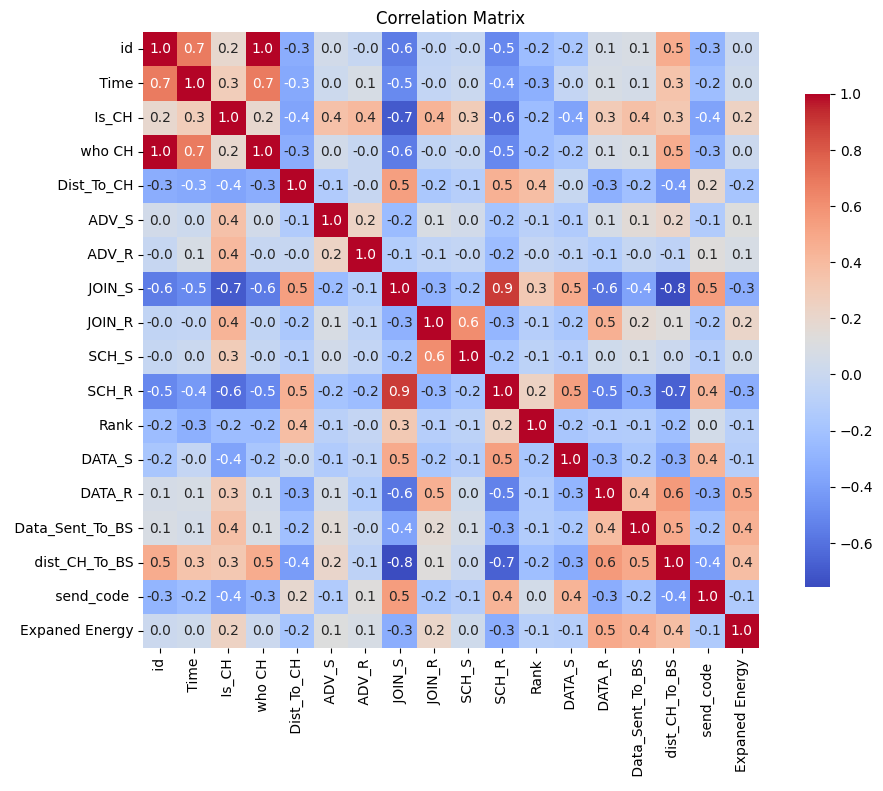

In [309]:
# print th correlation matrix with colored cells
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(DFOriginalInputs.corr(), annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


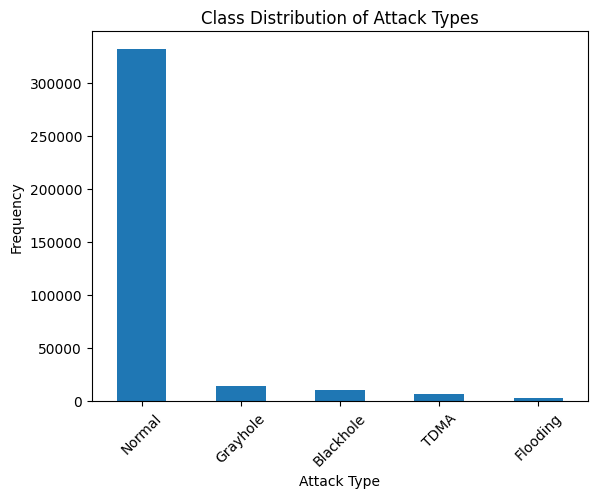

In [310]:
DFOriginalOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [311]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(DFInputs, DFOutput, test_size=0.2, stratify=DFOutput)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
DFSampledInputs, DFSampledOutput = smote.fit_resample(DFOriginalInputs, DFOriginalOutput)
# merge thsamplede  inputs and outputs back into a single DataFrame
DFSampled = pd.concat([DFSampledInputs, DFSampledOutput], axis=1)

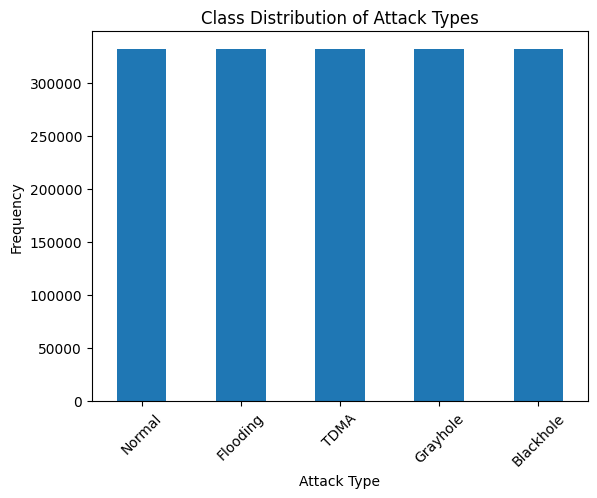

In [312]:
DFSampledOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [313]:
DFSampledOutput.value_counts()  

Attack type
Normal       332040
Flooding     332040
TDMA         332040
Grayhole     332040
Blackhole    332040
Name: count, dtype: int64

In [314]:
def OneHotEncoding(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import OneHotEncoder
    categorical_columns = DF.select_dtypes(include=['object']).columns.tolist()
    ohe = OneHotEncoder(sparse_output=False)
    encoded = ohe.fit_transform(DF[categorical_columns])
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_columns))
    DFONE = pd.concat([DF.drop(columns=categorical_columns), encoded_df], axis=1)
    return DFONE


In [315]:
ohe = OneHotEncoding(DFSampled)
ohe.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,...,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type_Blackhole,Attack type_Flooding,Attack type_Grayhole,Attack type_Normal,Attack type_TDMA
0,101000,50,1,101000,0.00000,1,0,0,25,1,...,1200,48,130.08535,0,2.46940,0.0,0.0,0.0,1.0,0.0
1,101001,50,0,101044,75.32345,0,4,1,0,0,...,0,0,0.00000,4,0.06957,0.0,0.0,0.0,1.0,0.0
2,101002,50,0,101010,46.95453,0,4,1,0,0,...,0,0,0.00000,3,0.06898,0.0,0.0,0.0,1.0,0.0
3,101003,50,0,101044,64.85231,0,4,1,0,0,...,0,0,0.00000,4,0.06673,0.0,0.0,0.0,1.0,0.0
4,101004,50,0,101010,4.83341,0,4,1,0,0,...,0,0,0.00000,3,0.06534,0.0,0.0,0.0,1.0,0.0


<Axes: >

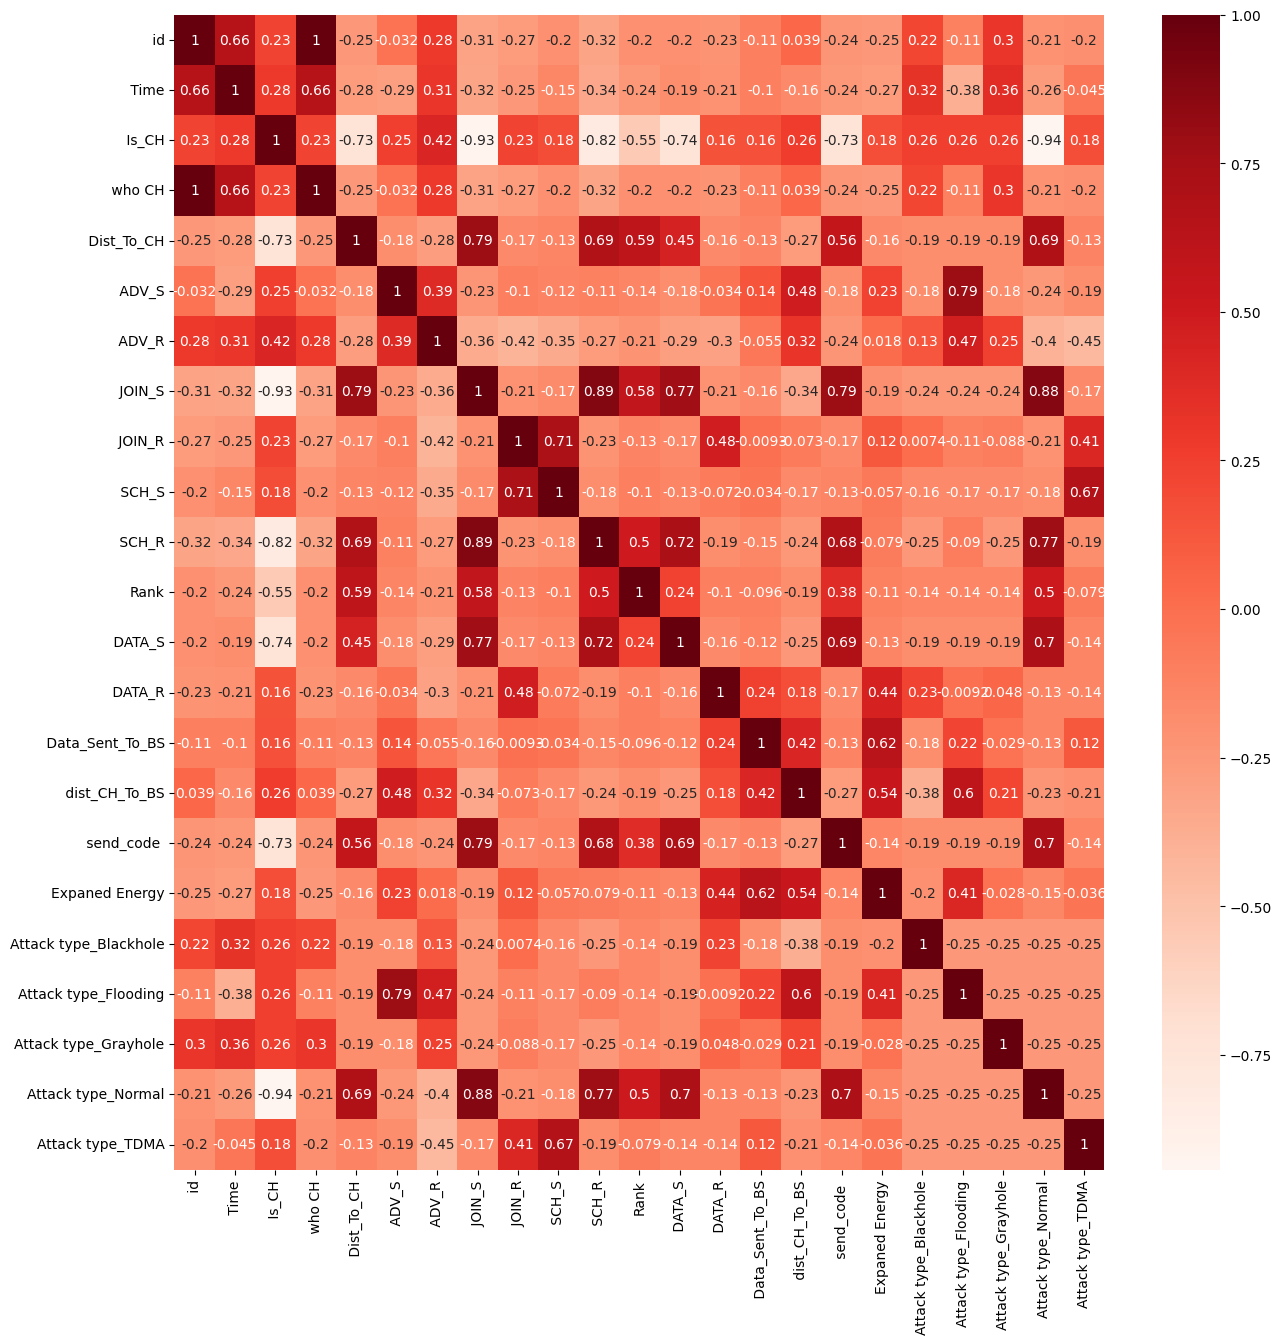

In [316]:
correlation_matrix = ohe.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)

In [317]:
def LabelEncoding(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import LabelEncoder
    categorical_columns = OutPutLabel
    le = LabelEncoder()
    encoded = le.fit_transform(DF[categorical_columns])
    encoded_df = pd.DataFrame(encoded, columns=[categorical_columns])
    DFLE = pd.concat([DF.drop(columns=[categorical_columns]), encoded_df], axis=1) # there is a problem here, let's fix it,
    return DFLE

In [318]:
from copy import deepcopy
DF : pd.DataFrame = LabelEncoding(deepcopy(DFSampled))
# split the DataFrame into inputs and outputs
DFInputs = DF[InputLabels]
DFOutput = DF[OutPutLabel]
print(DFInputs.shape, DFOutput.shape)

(1660200, 18) (1660200,)


In [319]:
# print shapes of the inputs and outputs
print('Inputs Shape: ', DFInputs.shape)
print('Outputs Shape: ', DFOutput.shape)
print('Inputs: ')
print(DFInputs.head())
print('Outputs: ')
print(DFOutput.head())


Inputs Shape:  (1660200, 18)
Outputs Shape:  (1660200,)
Inputs: 
       id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0  101000     50       1   101000      0.00000       1       0        0   
1  101001     50       0   101044     75.32345       0       4        1   
2  101002     50       0   101010     46.95453       0       4        1   
3  101003     50       0   101044     64.85231       0       4        1   
4  101004     50       0   101010      4.83341       0       4        1   

    JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
0       25       1       0     0        0     1200                48   
1        0       0       1     2       38        0                 0   
2        0       0       1    19       41        0                 0   
3        0       0       1    16       38        0                 0   
4        0       0       1    25       41        0                 0   

    dist_CH_To_BS   send_code   Expaned Energy  
0 

In [320]:
# use MinMaxScaler to scale the data
def MinMaxScaling(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    DFarr = scaler.fit_transform(DF)
    DFMMS = pd.DataFrame(DFarr, columns=scaler.get_feature_names_out(DF.columns.tolist()))
    return DFMMS

In [321]:
# use StandardScaler to scale the data
def StandardScaling(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    DFarr = scaler.fit_transform(DF)
    DFSS = pd.DataFrame(DFarr, columns=scaler.get_feature_names_out(DF.columns.tolist()))
    return DFSS

In [322]:
# use RobustScaler to scale the data
def RobustScaling(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    DFarr = scaler.fit_transform(DF)
    DFRS = pd.DataFrame(DFarr, columns=scaler.get_feature_names_out(DF.columns.tolist()))
    return DFRS

In [323]:
mms = MinMaxScaling(DFInputs)
mms.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,0.000000e+00,0.0,1.0,0.000000,0.000000,0.010309,0.000000,0.0,0.201613,0.010101,0.0,0.000000,0.000000,0.802139,0.19917,0.644194,0.000000,0.054761
1,3.029297e-07,0.0,0.0,0.000013,0.351528,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.020202,0.157676,0.000000,0.00000,0.000000,0.266667,0.001543
2,6.058594e-07,0.0,0.0,0.000003,0.219132,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.191919,0.170124,0.000000,0.00000,0.000000,0.200000,0.001530
3,9.087891e-07,0.0,0.0,0.000013,0.302660,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.161616,0.157676,0.000000,0.00000,0.000000,0.266667,0.001480
4,1.211719e-06,0.0,0.0,0.000003,0.022557,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.252525,0.170124,0.000000,0.00000,0.000000,0.200000,0.001449


In [324]:
ss = StandardScaling(DFInputs)
ss.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,-0.795590,-1.384813,0.511797,-0.795613,-0.374436,-0.362094,-1.382215,-0.474961,1.876262,-0.232008,-0.505973,-0.282807,-0.376747,3.126328,0.797408,1.266335,-0.374502,2.205173
1,-0.795587,-1.384813,-1.953898,-0.795496,4.895579,-0.486144,-0.994973,2.105435,-0.447730,-0.356203,1.976389,-0.041234,0.984296,-0.445590,-0.354803,-0.758802,2.197645,-0.541326
2,-0.795584,-1.384813,-1.953898,-0.795586,2.910744,-0.486144,-0.994973,2.105435,-0.447730,-0.356203,1.976389,2.012131,1.091747,-0.445590,-0.354803,-0.758802,1.554608,-0.542001
3,-0.795582,-1.384813,-1.953898,-0.795496,4.162965,-0.486144,-0.994973,2.105435,-0.447730,-0.356203,1.976389,1.649773,0.984296,-0.445590,-0.354803,-0.758802,2.197645,-0.544576
4,-0.795579,-1.384813,-1.953898,-0.795586,-0.036266,-0.486144,-0.994973,2.105435,-0.447730,-0.356203,1.976389,2.736849,1.091747,-0.445590,-0.354803,-0.758802,1.554608,-0.546167


In [325]:
rs = RobustScaling(DFInputs)
rs.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,-0.510309,-0.614016,0.0,-0.510309,0.00000,0.0,-0.428571,0.0,6.25,1.0,0.0,0.0,0.0,1200.0,3.692308,1.13922,0.0,3.704382
1,-0.510307,-0.614016,-1.0,-0.510197,75.32345,-1.0,-0.238095,1.0,0.00,0.0,1.0,2.0,38.0,0.0,0.000000,0.00000,4.0,-0.023237
2,-0.510304,-0.614016,-1.0,-0.510284,46.95453,-1.0,-0.238095,1.0,0.00,0.0,1.0,19.0,41.0,0.0,0.000000,0.00000,3.0,-0.024154
3,-0.510302,-0.614016,-1.0,-0.510197,64.85231,-1.0,-0.238095,1.0,0.00,0.0,1.0,16.0,38.0,0.0,0.000000,0.00000,4.0,-0.027648
4,-0.510299,-0.614016,-1.0,-0.510284,4.83341,-1.0,-0.238095,1.0,0.00,0.0,1.0,25.0,41.0,0.0,0.000000,0.00000,3.0,-0.029808


In [326]:
# use PCA to reduce the dimensionality of the data
def PCA(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    DFarr = pca.fit_transform(DF)
    DFpca = pd.DataFrame(DFarr, columns=[f'PC{i+1}' for i in range(n_components)])
    return DFpca
# use TSNE to reduce the dimensionality of the data
def TSNE(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=n_components)
    DFarr = tsne.fit_transform(DF)
    DFtsne = pd.DataFrame(DFarr, columns=[f'TSNE{i+1}' for i in range(n_components)])
    return DFtsne
# use UMAP to reduce the dimensionality of the data
def UMAP(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from umap import UMAP
    umap = UMAP(n_components=n_components)
    DFarr = umap.fit_transform(DF)
    DFumap = pd.DataFrame(DFarr, columns=[f'UMAP{i+1}' for i in range(n_components)])
    return DFumap
# use LDA to reduce the dimensionality of the data
def LDA(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    DFarr = lda.fit_transform(DF, DFOutput)
    DFlda = pd.DataFrame(DFarr, columns=[f'LDA{i+1}' for i in range(n_components)])
    return DFlda
# use ICA to reduce the dimensionality of the data
def ICA(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.decomposition import FastICA
    ica = FastICA(n_components=n_components)
    DFarr = ica.fit_transform(DF)
    DFica = pd.DataFrame(DFarr, columns=[f'ICA{i+1}' for i in range(n_components)])
    return DFica
# use NMF to reduce the dimensionality of the data
def NMF(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=n_components)
    DFarr = nmf.fit_transform(DF)
    DFnmf = pd.DataFrame(DFarr, columns=[f'NMF{i+1}' for i in range(n_components)])
    return DFnmf
# use SVD to reduce the dimensionality of the data
def SVD(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=n_components)
    DFarr = svd.fit_transform(DF)
    DFsvd = pd.DataFrame(DFarr, columns=[f'SVD{i+1}' for i in range(n_components)])
    return DFsvd
# use FA to reduce the dimensionality of the data
def FA(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.decomposition import FactorAnalysis
    fa = FactorAnalysis(n_components=n_components)
    DFarr = fa.fit_transform(DF)
    DFfa = pd.DataFrame(DFarr, columns=[f'FA{i+1}' for i in range(n_components)])
    return DFfa
# use KMeans to reduce the dimensionality of the data
def KMeans(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_components)
    DFarr = kmeans.fit_transform(DF)
    DFkmeans = pd.DataFrame(DFarr, columns=[f'KMeans{i+1}' for i in range(n_components)])
    return DFkmeans
# use DBSCAN to reduce the dimensionality of the data
def DBSCAN(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    DFarr = dbscan.fit_transform(DF)
    DFdbscan = pd.DataFrame(DFarr, columns=[f'DBSCAN{i+1}' for i in range(n_components)])
    return DFdbscan
# use AgglomerativeClustering to reduce the dimensionality of the data
def AgglomerativeClustering(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import AgglomerativeClustering
    agglomerative = AgglomerativeClustering(n_clusters=n_components)
    DFarr = agglomerative.fit_transform(DF)
    DFagglomerative = pd.DataFrame(DFarr, columns=[f'Agglomerative{i+1}' for i in range(n_components)])
    return DFagglomerative
# use Birch to reduce the dimensionality of the data
def Birch(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import Birch
    birch = Birch(n_clusters=n_components)
    DFarr = birch.fit_transform(DF)
    DFbirch = pd.DataFrame(DFarr, columns=[f'Birch{i+1}' for i in range(n_components)])
    return DFbirch
# use MeanShift to reduce the dimensionality of the data
def MeanShift(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import MeanShift
    meanshift = MeanShift()
    DFarr = meanshift.fit_transform(DF)
    DFmeanshift = pd.DataFrame(DFarr, columns=[f'MeanShift{i+1}' for i in range(n_components)])
    return DFmeanshift
# use SpectralClustering to reduce the dimensionality of the data
def SpectralClustering(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import SpectralClustering
    spectral = SpectralClustering(n_clusters=n_components)
    DFarr = spectral.fit_transform(DF)
    DFspectral = pd.DataFrame(DFarr, columns=[f'Spectral{i+1}' for i in range(n_components)])
    return DFspectral
# use OPTICS to reduce the dimensionality of the data
def OPTICS(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import OPTICS
    optics = OPTICS()
    DFarr = optics.fit_transform(DF)
    DFoptics = pd.DataFrame(DFarr, columns=[f'OPTICS{i+1}' for i in range(n_components)])
    return DFoptics
# use AffinityPropagation to reduce the dimensionality of the data
def AffinityPropagation(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.cluster import AffinityPropagation
    affinity = AffinityPropagation()
    DFarr = affinity.fit_transform(DF)
    DFaAffinity = pd.DataFrame(DFarr, columns=[f'Affinity{i+1}' for i in range(n_components)])
    return DFaAffinity
# use GaussianMixture to reduce the dimensionality of the data
def GaussianMixture(DF : pd.DataFrame, n_components: int) -> pd.DataFrame:
    from sklearn.mixture import GaussianMixture
    gmm = GaussianMixture(n_components=n_components)
    DFarr = gmm.fit_transform(DF)
    DFgmm = pd.DataFrame(DFarr, columns=[f'GaussianMixture{i+1}' for i in range(n_components)])
    return DFgmm

In [327]:
DRFunctions = [PCA, TSNE, UMAP, LDA, ICA, NMF,
               SVD, FA, KMeans, DBSCAN, AgglomerativeClustering,
               Birch, MeanShift, SpectralClustering, OPTICS,
               AffinityPropagation, GaussianMixture]
DRFunctions.__len__()

17

In [328]:
# HEREHEREHEREHEREHEREHEREHEREHEREHEREHEREHEREHEREHEREHEREHEREHERE
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
# here the DFInputs and DFOutput are sampled and the output is encoded
DFTrainInputs, DFTestInputs, DFTrainOutput, DFTestOutput = train_test_split(DFInputs, DFOutput, test_size=0.2, stratify=DFOutput)
# print the shape of the train and test sets
print(f'{'DFTrainInputs shape: ': <20}', DFTrainInputs.shape)
print(f'{'DFTestInputs  shape: ': <20}', DFTestInputs.shape)
print(f'{'DFTrainOutput shape: ': <20}', DFTrainOutput.shape)
print(f'{'DFTestOutput  shape: ': <20}', DFTestOutput.shape)

DFTrainInputs shape:  (1328160, 18)
DFTestInputs  shape:  (332040, 18)
DFTrainOutput shape:  (1328160,)
DFTestOutput  shape:  (332040,)


In [329]:
DFTrainInputs.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
1518902,214067,1703,1,214067,0.00000,1,4,0,8,8,0,0,0,0,0,0.000000,0,0.00739
138871,1004008,3503,1,1004100,0.00000,1,26,0,0,0,0,0,0,0,3,112.302370,0,0.01473
287643,506044,1553,0,506100,0.00000,0,0,0,0,0,0,0,13,351,13,125.332770,0,0.62971
132576,110085,503,0,110006,4.84095,0,4,1,0,0,1,27,41,0,0,0.000000,4,0.07089
851241,601026,703,1,601026,0.00000,21,28,0,0,0,0,0,0,0,13,62.358989,0,0.21913


In [330]:
DFTrainOutput.head()

1518902    4
138871     2
287643     3
132576     3
851241     1
Name: Attack type, dtype: int64

In [331]:
# # # Define the objective function for PSO (feature selection)
# import numpy
# import sklearn.ensemble
# import sklearn.metrics
# from pyswarm import pso

# def objective_function(params):
#     # Convert continuous PSO output to binary (0 or 1) for feature selection
#     selected_features = numpy.where(params > 0.5, 1, 0).astype(int)  # Features selected if param > 0.5
    
#     # Select the features based on the current particle's vector
#     X_train_selected = DFTrainInputs.iloc[:, selected_features == 1]
#     X_test_selected = DFTestInputs.iloc[:, selected_features == 1]
    
#     # Train a Random Forest Classifier on the selected features
#     model = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train_selected, DFTrainOutput)
#     y_pred = model.predict(X_test_selected)
    
#     # Calculate accuracy (you can use other metrics like F1, ROC, etc.)
#     accuracy = sklearn.metrics.accuracy_score(DFTestOutput, y_pred)
    
#     return -accuracy  # PSO minimizes, so return negative accuracy
# #  Define bounds for PSO (we'll use 0 and 1 to represent feature selection)
# lb = numpy.zeros(DFOriginalInputs.shape[1])  # Lower bounds (exclude all features initially)
# ub = numpy.ones(DFOriginalInputs.shape[1])   # Upper bounds (include all features initially)
# #  Apply PSO
# best_features, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=2)
# #  Get selected features based on the best particle found
# selected_features = numpy.where(best_features > 0.5, 1, 0).astype(int)
# # Display the selected feature indices
# print("Selected feature indices:", numpy.where(selected_features == 1)[0])
# # Train and evaluate the model with the selected features
# X_train_selected = DFTrainInputs.iloc[:, selected_features == 1]
# X_test_selected = DFTestInputs.iloc[:, selected_features == 1]
# model = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_selected, DFTrainOutput)
# y_pred = model.predict(X_test_selected)
# accuracy = sklearn.metrics.accuracy_score(DFTestOutput, y_pred)
# print(f'Model accuracy with selected features: {accuracy}')

# # for different swarm size

# #  Apply PSO
# best_features, _ = pso(objective_function, lb, ub, swarmsize=5, maxiter=2)
# #  Get selected features based on the best particle found
# selected_features = numpy.where(best_features > 0.5, 1, 0).astype(int)
# # Display the selected feature indices
# print("Selected feature indices:", numpy.where(selected_features == 1)[0])
# #  Train and evaluate the model with the selected features
# X_train_selected = DFTrainInputs.iloc[:, selected_features == 1]
# X_test_selected = DFTestInputs.iloc[:, selected_features == 1]
# model = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_selected, DFTrainOutput)
# y_pred = model.predict(X_test_selected)
# accuracy = sklearn.metrics.accuracy_score(DFTestOutput, y_pred)
# print(f'Model accuracy with selected features: {accuracy}')

In [332]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# import matplotlib.pyplot as plt

# # Train a Random Forest Classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(DFTrainInputs, DFTrainOutput)

# # Get feature importances
# feature_importances = pd.Series(rf.feature_importances_, index=DFTrainInputs.columns)

# # Sort features by importance
# sorted_features = feature_importances.sort_values(ascending=False)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# sorted_features.plot(kind='bar')
# plt.title('Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance Score')
# plt.show()

# # Select top N features (e.g., top 10)
# top_features = sorted_features.head(10).index.tolist()
# print("Top 10 Features:", top_features)


In [333]:
DFTrainInputs.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
1518902,214067,1703,1,214067,0.00000,1,4,0,8,8,0,0,0,0,0,0.000000,0,0.00739
138871,1004008,3503,1,1004100,0.00000,1,26,0,0,0,0,0,0,0,3,112.302370,0,0.01473
287643,506044,1553,0,506100,0.00000,0,0,0,0,0,0,0,13,351,13,125.332770,0,0.62971
132576,110085,503,0,110006,4.84095,0,4,1,0,0,1,27,41,0,0,0.000000,4,0.07089
851241,601026,703,1,601026,0.00000,21,28,0,0,0,0,0,0,0,13,62.358989,0,0.21913


In [334]:
top_features = [' ADV_S', ' SCH_S', 'Expaned Energy', ' Is_CH', ' Data_Sent_To_BS', ' dist_CH_To_BS', ' ADV_R', ' DATA_R', ' JOIN_R', ' DATA_S', 'Rank', ' Time']
# DFTrainInputs[top_features].head()

In [335]:
selected_features =  [ 0, 1, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16]
# print(DFTrainInputs.shape, DFTestInputs.shape)
# DFTrainInputs = DFTrainInputs.iloc[:, selected_features]
# DFTestInputs = DFTestInputs.iloc[:, selected_features]
DFTrainInputs = DFTrainInputs[top_features]
DFTestInputs = DFTestInputs[top_features]

In [336]:
print(f'{'DFTrainInputs shape: ': <20}', DFTrainInputs.shape)
print(f'{'DFTestInputs  shape: ': <20}', DFTestInputs.shape)
print(f'{'DFTrainOutput shape: ': <20}', DFTrainOutput.shape)
print(f'{'DFTestOutput  shape: ': <20}', DFTestOutput.shape)

DFTrainInputs shape:  (1328160, 12)
DFTestInputs  shape:  (332040, 12)
DFTrainOutput shape:  (1328160,)
DFTestOutput  shape:  (332040,)


In [337]:
# construct a pipeline that includes the scaling and label encoding
import sklearn.linear_model
import sklearn.metrics
import sklearn.multioutput

DFTrainInputsList : list[pd.DataFrame] = [
    MinMaxScaling(DFTrainInputs),
    StandardScaling(DFTrainInputs),
    RobustScaling(DFTrainInputs),
]
DFTestInputsList : list[pd.DataFrame] = [
    MinMaxScaling(DFTestInputs),
    StandardScaling(DFTestInputs),
    RobustScaling(DFTestInputs),
]
# for every model we have to try all of the list of encoding methods
def TrainModel(model, output : pd.DataFrame) -> dict:
    models : dict[str, any] = {
        'original' : model,
    }
    for input in DFTrainInputsList:
        model.fit(input, output)
        models[f'{model.__class__.__name__}'] = model
    return models


# ModelRF = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# ModelRF.fit(DFTrainInputsList[0], DFTrainOutput)
# y_pred = ModelRF.predict(DFTestInputsList[0])
xtrain = MinMaxScaling(DFTrainInputs)
ytrain = DFTrainOutput
xtest = MinMaxScaling(DFTestInputs)
ytest = DFTestOutput

ModelLG = sklearn.linear_model.LogisticRegression(max_iter=500,solver='newton-cg',class_weight='balanced')
ModelLG.fit(xtrain, ytrain)
ypred = ModelLG.predict(xtest)
ypredProba = ModelLG.predict_proba(xtest)
print("Accuracy:", sklearn.metrics.accuracy_score(DFTestOutput, ypred))

# for model in models:
#     print(f'{model} : {m[model]}')

Accuracy: 0.9034272979159137


In [338]:
cm = sklearn.metrics.confusion_matrix(DFTestOutput, ypred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[66408     0     0     0     0]
 [   11 66316    66     2    13]
 [25416     2 40673    12   305]
 [    2   117  1553 64580   156]
 [  175     0   175  4061 61997]]


In [339]:
accuracy_logistic = sklearn.metrics.accuracy_score(DFTestOutput,ypred)
balanced_accuracy_logistic = sklearn.metrics.balanced_accuracy_score(DFTestOutput,ypred)
precision_logistic = sklearn.metrics.precision_score(DFTestOutput,ypred,average='weighted')
recall_logistic = sklearn.metrics.recall_score(DFTestOutput,ypred,average='weighted')
f1_logistic = sklearn.metrics.f1_score(DFTestOutput,ypred,average='weighted')
roc_auc_logistic = sklearn.metrics.roc_auc_score(DFTestOutput,ypredProba, average='weighted', multi_class='ovr')
matthews_corrcoef_logistic = sklearn.metrics.matthews_corrcoef(DFTestOutput,ypred)

In [340]:
print(f'{'accuracy_logistic': <30}', accuracy_logistic)
print(f'{'balanced_accuracy_logistic': <30}', balanced_accuracy_logistic)
print(f'{'precision_logistic': <30}', precision_logistic)
print(f'{'recall_logistic': <30}', recall_logistic)
print(f'{'f1_logistic': <30}', f1_logistic)
print(f'{'roc_auc_logistic': <30}', roc_auc_logistic)
print(f'{'matthews_corrcoef_logistic': <30}', matthews_corrcoef_logistic)

accuracy_logistic              0.9034272979159137
balanced_accuracy_logistic     0.9034272979159137
precision_logistic             0.9221507783569397
recall_logistic                0.9034272979159137
f1_logistic                    0.90046635060979
roc_auc_logistic               0.985047072585615
matthews_corrcoef_logistic     0.8855782290982032


In [341]:
"""
TODO: 
    - done: solve the impbalancing in the dataset
    - done: split the dataset into train and test sets
    - done: scale the dataset using:
        - MinMaxScaler 
        - StandardScaler 
        - RobustScaler
    - done: categorical encoding using:
        - LabelEncoder: for the OutPutLabel
        - OneHotEncoder: for the OutPutLabel
    - use dimensionality reduction techniques:
        - the techniques listed in the DRFunctions list

    - layout the different calssifiers we may use
        - NOTE: make a grid/random search for the best parameters for each classifier independently finish one by one
        - SGDClassifier
        - DecisionTreeClassifier
        - RandomForestClassifier
        - KNeighborsClassifier
        - MLPClassifier
        - SVC
        - SVM
        - LogisticRegression
        - AdaBoostClassifier
        - GradientBoostingClassifier
        - XGBClassifier
        - LGBMClassifier
        - ExtraTreesClassifier
        - BaggingClassifier
        - VotingClassifier
"""

'\nTODO: \n    - done: solve the impbalancing in the dataset\n    - done: split the dataset into train and test sets\n    - done: scale the dataset using:\n        - MinMaxScaler \n        - StandardScaler \n        - RobustScaler\n    - done: categorical encoding using:\n        - LabelEncoder: for the OutPutLabel\n        - OneHotEncoder: for the OutPutLabel\n    - use dimensionality reduction techniques:\n        - the techniques listed in the DRFunctions list\n\n    - layout the different calssifiers we may use\n        - NOTE: make a grid/random search for the best parameters for each classifier independently finish one by one\n        - SGDClassifier\n        - DecisionTreeClassifier\n        - RandomForestClassifier\n        - KNeighborsClassifier\n        - MLPClassifier\n        - SVC\n        - SVM\n        - LogisticRegression\n        - AdaBoostClassifier\n        - GradientBoostingClassifier\n        - XGBClassifier\n        - LGBMClassifier\n        - ExtraTreesClassifier